In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hek_df = pd.read_csv('hek', sep="\t")

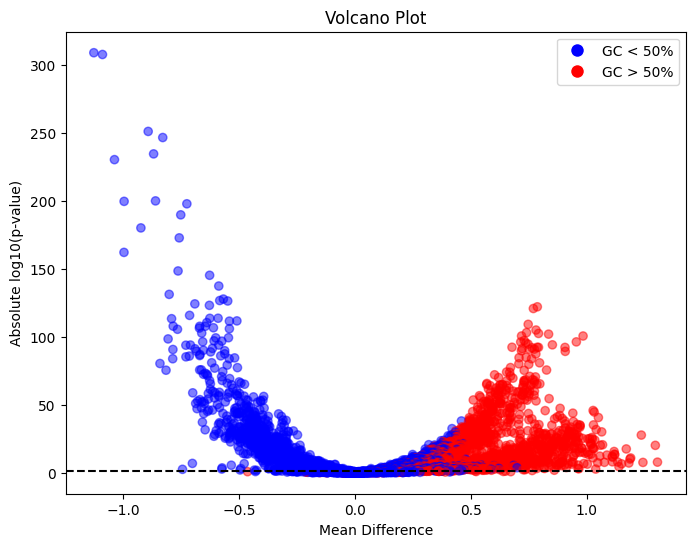

In [32]:
hek_df = pd.read_csv('hek', sep="\t")
# Calculate the absolute log10_p_value
hek_df['abs_log10_p_value'] = np.abs(hek_df['log10_p_value'])

# Calculate GC content for each kmer_seq
def calculate_gc_content(seq):
    return (seq.count('G') + seq.count('C')) / len(seq) * 100

hek_df['GC_content'] = hek_df['kmer_seq'].apply(calculate_gc_content)

# Create a new column for coloring based on GC content
hek_df['color'] = np.where(hek_df['GC_content'] > 50, 'red', 'blue')  # Red for >50%, Blue for <50%

# Set the threshold for log10(p-value) corresponding to p-value < 0.05
pvalue_threshold = -np.log10(0.05)

# Plotting the volcano plot with axes switched
plt.figure(figsize=(8, 6))
plt.scatter(hek_df['median_diff'], hek_df['abs_log10_p_value'], c=hek_df['color'], alpha=0.5)
plt.axhline(y=pvalue_threshold, color='black', linestyle='--', label='p-value = 0.05')  # Horizontal line for p-value
plt.title('Volcano Plot')
plt.ylabel('Absolute log10(p-value)')
plt.xlabel('Mean Difference')

# Custom legend for scatter plot size (we will manually add the color and size legend)
legend1 = plt.legend(handles=[blue_dot, red_dot], loc='upper right')

# Display the plot
plt.show()


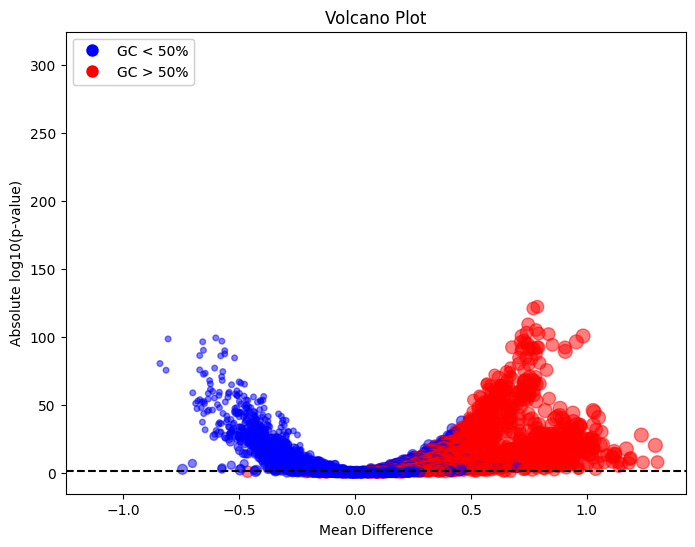

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.lines as mlines

# Assuming hek_df is your DataFrame and it's already loaded

# Calculate the absolute log10_p_value
hek_df['abs_log10_p_value'] = np.abs(hek_df['log10_p_value'])

# Calculate GC content for each kmer_seq
def calculate_gc_content(seq):
    return (seq.count('G') + seq.count('C')) / len(seq) * 100

hek_df['GC_content'] = hek_df['kmer_seq'].apply(calculate_gc_content)

# Create a new column for coloring based on GC content
hek_df['color'] = np.where(hek_df['GC_content'] > 50, 'red', 'blue')  # Red for >50%, Blue for <50%

# Set the threshold for log10(p-value) corresponding to p-value < 0.05
pvalue_threshold = -np.log10(0.05)

# Normalize the GC content to control dot size
max_gc = hek_df['GC_content'].max()
hek_df['dot_size'] = (hek_df['GC_content'] / max_gc) * 100  # Scaling the size

# Plotting the volcano plot with axes switched
plt.figure(figsize=(8, 6))
scatter = plt.scatter(hek_df['median_diff'], hek_df['abs_log10_p_value'], c=hek_df['color'], 
                      s=hek_df['dot_size'], alpha=0.5)

# Add a horizontal line for p-value threshold
plt.axhline(y=pvalue_threshold, color='black', linestyle='--', label='p-value = 0.05')

# Add title and labels
plt.title('Volcano Plot')
plt.ylabel('Absolute log10(p-value)')
plt.xlabel('Mean Difference')

# Create custom legend for GC content
blue_dot = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='GC < 50%')
red_dot = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='GC > 50%')

# Custom legend for scatter plot size (we will manually add the color and size legend)
legend1 = plt.legend(handles=[blue_dot, red_dot], loc='upper left')

# Add the custom legends to the plot
plt.gca().add_artist(legend1)

# Display the plot
plt.show()


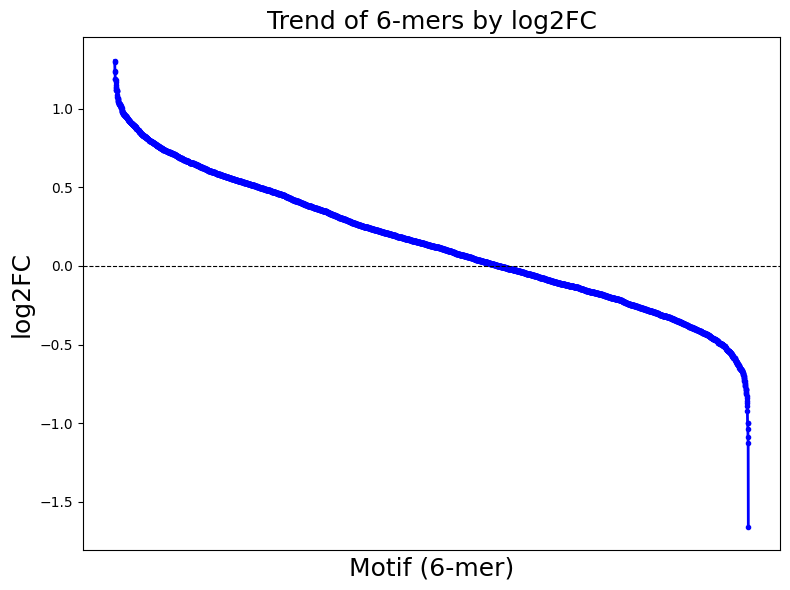

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and sort the data by log2FC (median_diff)
hek_df = pd.read_csv('hek', sep='\t')
hek_df = hek_df.sort_values(by='median_diff', ascending=False).reset_index(drop=True)

# Add an index column for x-axis
hek_df['Index'] = range(len(hek_df))

# Get x and y values for plotting
x_values = hek_df['Index']
y_values = hek_df['median_diff']

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', linewidth=2, markersize=3, color='blue')

# Add a horizontal reference line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Remove x-axis labels
plt.xticks([])

# Labels and title
plt.xlabel("Motif (6-mer)", fontsize=18)
plt.ylabel("log2FC", fontsize=18)
plt.title("Trend of 6-mers by log2FC", fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


## Using R

In [1]:
install.packages(c("ggplot2", "gghalves", "scales"))


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



     position kmer_seq n_total_seq n_with_match median_diff log10_p_value Index
1115     3463   CGCGTC       11160           28    1.305177      8.088430     1
545      3460   CGCGGC       11160           74    1.295949     20.426413     2
1142     2588   CGACGG       11160           25    1.242485      7.879153     3
359      3398   CCGCGG       11160          108    1.235526     27.981501     4
907      3863   TCCGCG       11160           45    1.189615     11.146419     5
     position kmer_seq n_total_seq n_with_match median_diff log10_p_value Index
4081       75   TAATAA       11160         1366   -0.996135     -162.3004  4092
4088       36   ATTAAA       11160         1927   -1.037199     -230.4939  4093
4092       66   AAATAA       11160         2530   -1.088943     -307.7980  4094
4093        6   ATAAAA       11160         2344   -1.126170     -309.0976  4095
4094       18   AATAAA       11160         2567   -1.660119          -Inf  4096


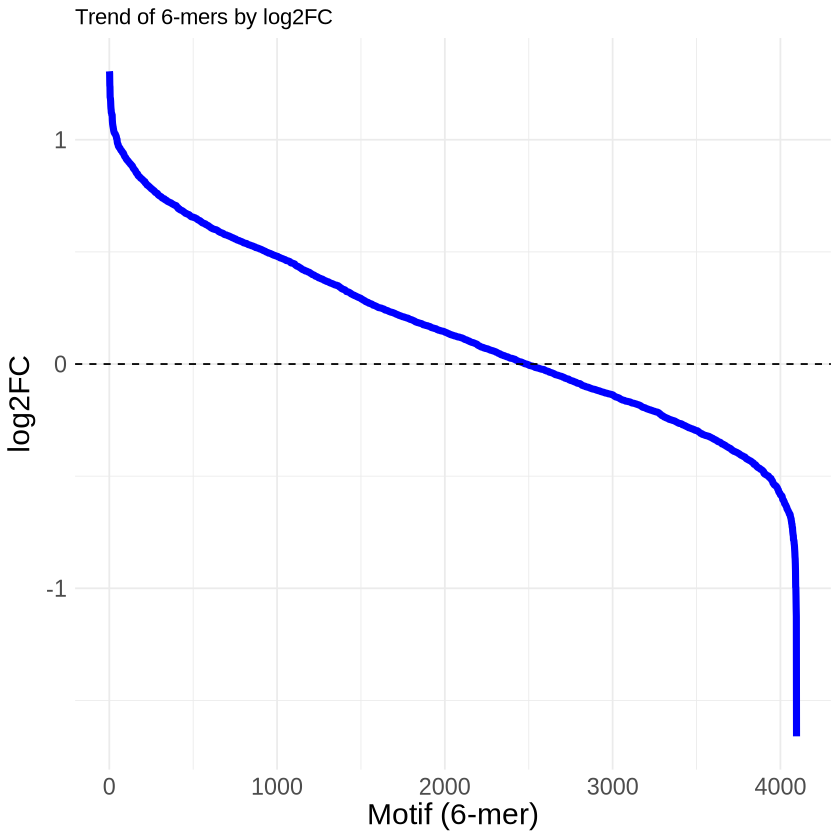

In [28]:
library(ggplot2)

# Read data
hek_df <- read.table("hek", header=TRUE, sep="\t")

# Sort by log2FC (median_diff)
hek_df <- hek_df[order(-hek_df$median_diff), ]

# Add an index column for x-axis
hek_df$Index <- seq_along(hek_df$median_diff)

# Select first 5 and last 5 motifs
top_5 <- head(hek_df, 5)
bottom_5 <- tail(hek_df, 5)

print(top_5)
print(bottom_5)

ggplot(hek_df, aes(x = Index, y = median_diff)) +
  geom_line(color = "blue", linewidth = 2) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  # scale_x_continuous(breaks = c(top_5$Index, bottom_5$Index)) + 
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5, size = 14),  # Increase x-axis text size
    axis.text.y = element_text(size = 14),  # Increase y-axis text size
    axis.title.x = element_text(size = 18),  # Increase x-axis label size
    axis.title.y = element_text(size = 18)   # Increase y-axis label size
  ) +
  labs(title = "Trend of 6-mers by log2FC", x = "Motif (6-mer)", y = "log2FC")


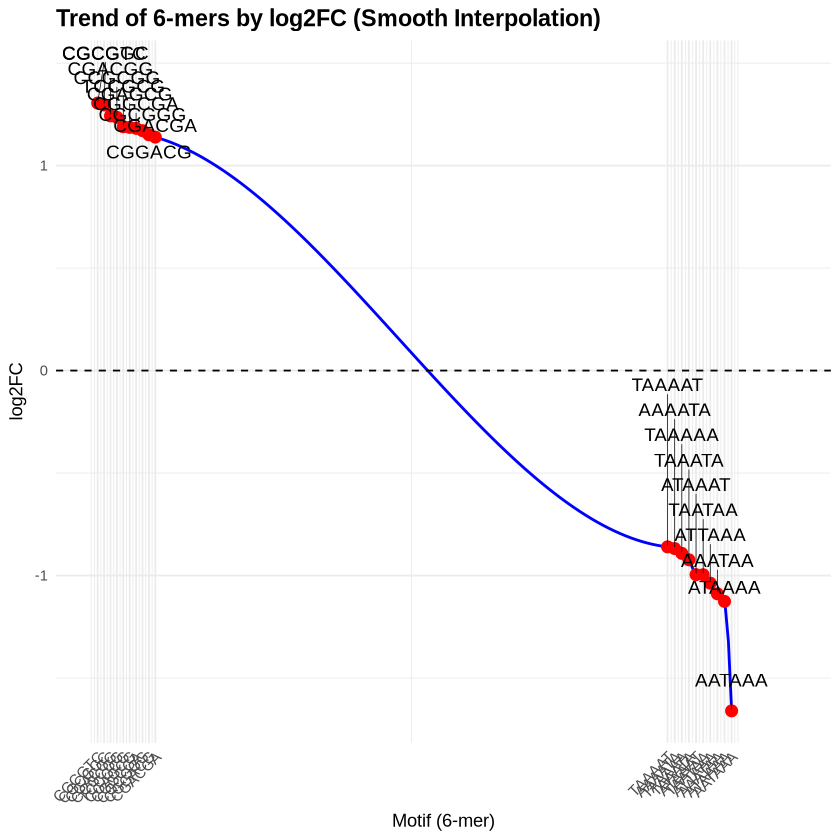

In [6]:
# Load required libraries
library(ggplot2)
library(ggrepel)
library(dplyr)

# Read data (adjust the file path as needed)
hek_df <- read.table("hek", header = TRUE, sep = "\t")

# Sort data by log2FC (median_diff) in descending order
hek_df <- hek_df[order(-hek_df$median_diff), ]
hek_df$Index <- seq_along(hek_df$median_diff)

# Select top 10 and bottom 10 motifs
top_10 <- head(hek_df, 10)
bottom_10 <- tail(hek_df, 10)

# Create artificial x-axis positions to stretch the groups apart.
# Top 10: positions 1 to 10; Bottom 10: positions 90 to 100.
top_10 <- top_10 %>% mutate(StretchIndex = seq(1, 10))
bottom_10 <- bottom_10 %>% mutate(StretchIndex = seq(90, 100, length.out = n()))

# Combine the two datasets for plotting
plot_data <- bind_rows(top_10, bottom_10)

# Create a smooth interpolation using spline()
smooth_interp <- with(plot_data, spline(StretchIndex, median_diff, n = 200))
smooth_df <- data.frame(x = smooth_interp$x, y = smooth_interp$y)

# Now create the plot:
p <- ggplot() +
  # Plot the smooth interpolated line
  geom_line(data = smooth_df, aes(x = x, y = y), color = "blue", linewidth = 0.8) +
  # Plot the actual points
  geom_point(data = plot_data, aes(x = StretchIndex, y = median_diff), color = "red", size = 3) +
  # Use geom_text_repel to place labels without overlapping
  geom_text_repel(data = plot_data, 
                  aes(x = StretchIndex, y = median_diff, label = kmer_seq),
                  size = 4, 
                  direction = "y", 
                  nudge_y = 0.15, 
                  segment.size = 0.2) +
  # Add horizontal line at y=0
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  # Customize the x-axis with breaks and labels for the top and bottom motifs
  scale_x_continuous(breaks = c(top_10$StretchIndex, bottom_10$StretchIndex),
                     labels = c(top_10$kmer_seq, bottom_10$kmer_seq),
                     limits = c(0, 110),
                     expand = expansion(mult = c(0.05, 0.05))) +
  labs(title = "Trend of 6-mers by log2FC (Smooth Interpolation)",
       x = "Motif (6-mer)",
       y = "log2FC") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold", size = 14))

# Display the plot
print(p)


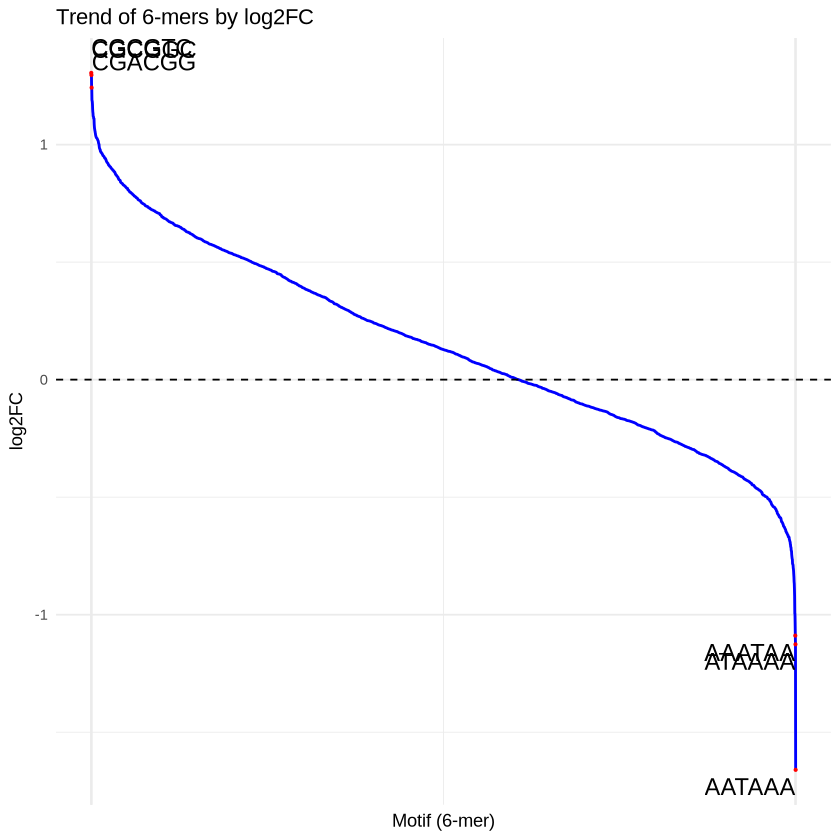

In [22]:
library(ggplot2)

# Read data
hek_df <- read.table("hek", header = TRUE, sep = "\t")

# Sort by log2FC (median_diff) in descending order
hek_df <- hek_df[order(-hek_df$median_diff), ]

# Add an index column for x-axis
hek_df$Index <- seq_along(hek_df$median_diff)

# Select the first 3 and last 3 motifs
top_10 <- head(hek_df, 3)
bottom_10 <- tail(hek_df, 3)

# Plot using ggplot2 with updated label sizes and hidden x-axis tick labels
p <- ggplot(hek_df, aes(x = Index, y = median_diff)) +
  geom_line(color = "blue", linewidth = 0.8) +
  geom_point(data = top_10, aes(x = Index, y = median_diff), color = "red", size = 0.5) +
  geom_point(data = bottom_10, aes(x = Index, y = median_diff), color = "red", size = 0.5) +
  geom_text(data = top_10, aes(x = Index, y = median_diff, label = kmer_seq),
            vjust = -1, hjust = 0, nudge_x = 0.2, size = 5) +  # Increased label size
  geom_text(data = bottom_10, aes(x = Index, y = median_diff, label = kmer_seq),
            vjust = 1.5, hjust = 1, nudge_x = -0.2, size = 5) +  # Increased label size
  geom_hline(yintercept = 0, linetype = "dashed") +
  # Optionally keep the original scale_x_continuous settings if needed:
  scale_x_continuous(breaks = c(top_10$Index, bottom_10$Index),
                     labels = c(top_10$kmer_seq, bottom_10$kmer_seq)) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank()  # Remove x-axis tick labels
  ) +
  labs(title = "Trend of 6-mers by log2FC", x = "Motif (6-mer)", y = "log2FC")

print(p)


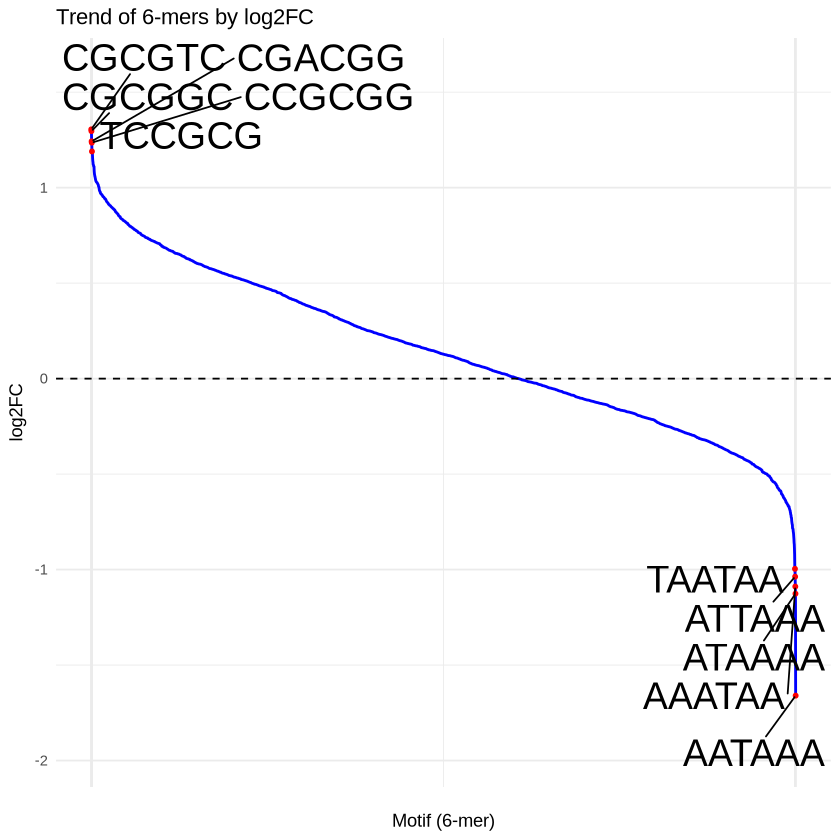

In [28]:
# Install and load ggrepel if you haven't already
if (!requireNamespace("ggrepel", quietly = TRUE)) {
  install.packages("ggrepel")
}
library(ggrepel)
library(ggplot2)

# Read data
hek_df <- read.table("hek", header = TRUE, sep = "\t")

# Sort by log2FC (median_diff) in descending order
hek_df <- hek_df[order(-hek_df$median_diff), ]

# Add an index column for x-axis
hek_df$Index <- seq_along(hek_df$median_diff)

# Select the first 3 and last 3 motifs
top_10 <- head(hek_df, 5)
bottom_10 <- tail(hek_df, 5)

# Plot using ggplot2 with geom_text_repel to avoid overlapping text
p <- ggplot(hek_df, aes(x = Index, y = median_diff)) +
  geom_line(color = "blue", linewidth = 0.8) +
  geom_point(data = top_10, aes(x = Index, y = median_diff), color = "red", size = 1) +
  geom_point(data = bottom_10, aes(x = Index, y = median_diff), color = "red", size = 1) +
  geom_text_repel(data = top_10, 
                  aes(x = Index, y = median_diff, label = kmer_seq),
                  nudge_y = 0.3,   # nudges text upward
                  size = 8) +
  geom_text_repel(data = bottom_10, 
                  aes(x = Index, y = median_diff, label = kmer_seq),
                  nudge_y = -0.3,  # nudges text downward
                  size = 8) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  scale_x_continuous(
    breaks = c(top_10$Index, bottom_10$Index),
    labels = rep("", length(c(top_10$Index, bottom_10$Index)), size=12)  # Remove x-axis tick labels if desired
  ) +
  theme_minimal() +
  labs(title = "Trend of 6-mers by log2FC", x = "Motif (6-mer)", y = "log2FC")

print(p)
# After creating your plot 'p'
ggsave("myplot.png", plot = p, width = 20, height = 8, units = "in")
